In [3]:
from IPython.display import Image
import cv2
import numpy as np
import glob

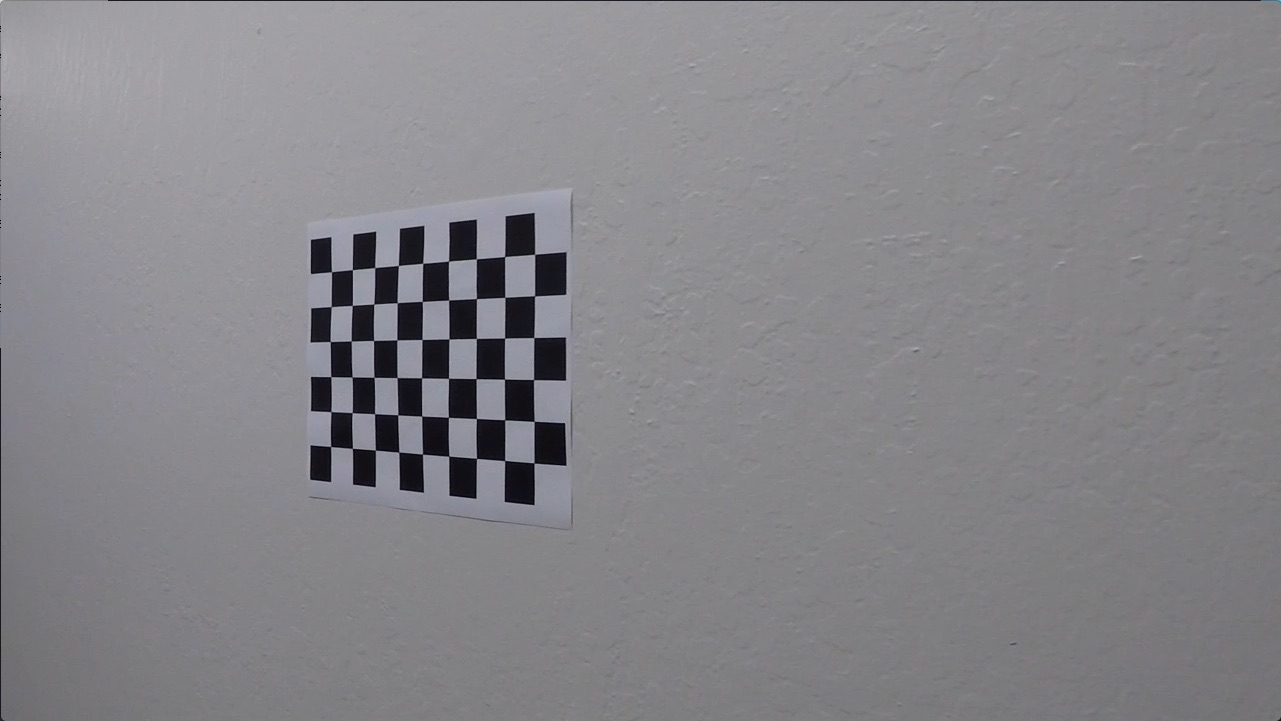

In [4]:
fname='camera_cal/calibration7.jpg'
Image(filename=fname) 

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

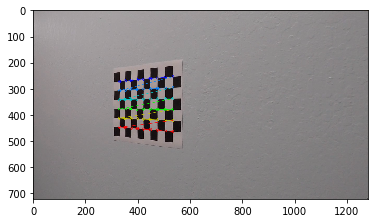

In [83]:

img = cv2.imread(fname)

nx = 9
ny = 6

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the chessboard corners
found, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

# If found, draw corners
if found == True:
    # Draw and display the corners
    cv2.drawChessboardCorners(img, (nx, ny), corners, found)
    plt.imshow(img)


In [84]:
objp = np.zeros((nx * ny, 3), np.float32)
objp[:, :2] = np.mgrid[0:nx,0:ny].transpose().reshape(-1,2)

In [85]:
imgpoints = [corners]
objpoints = [objp]

In [93]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(
    objpoints,
    imgpoints,
    gray.shape[::-1],
    None,
    None
)

In [111]:
test_image = cv2.imread('camera_cal/calibration7.jpg')

In [112]:
undistorted = cv2.undistort(
    test_image,
    mtx,
    dist,
    None,
    mtx
)

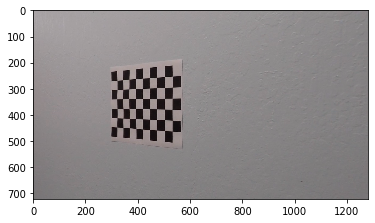

In [113]:
plt.imshow(undistorted)

In [56]:
fnames = glob.glob("camera_cal/*")

In [97]:
imgpoints = []
objpoints = []
for fname in fnames:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    #found, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    found, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
        
    if not found:
        print("Could not find corners in {}".format(fname))
        continue
    
    imgpoints.append(corners)
    objpoints.append(objp)

Could not find corners in camera_cal/calibration1.jpg
Could not find corners in camera_cal/calibration4.jpg
Could not find corners in camera_cal/calibration5.jpg


In [72]:
len(imgpoints)

17

In [98]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(
    objpoints,
    imgpoints,
    gray.shape[::-1],
    None,
    None
)

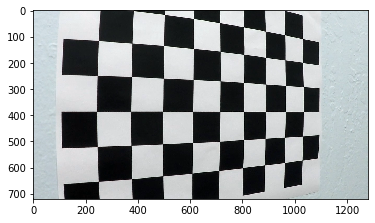

In [137]:
test_image = cv2.imread('camera_cal/calibration5.jpg')
undistorted = cv2.undistort(
    test_image,
    mtx,
    dist,
    None,
    mtx
)
plt.imshow(test_image)

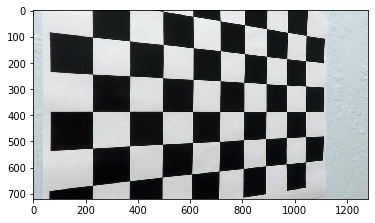

In [138]:
plt.imshow(undistorted)